# <font color='blue'>0. Identify  Business needs</font> <a class="anchor" id="first-bullet"></a>
[Back to TOC](#toc)

### Get overview about the problem and data availible

#### Gender Classification Dataset
###### Male Female image dataset
The data set is of cropped images of male and female . It is split into training and validation directory. 
Training contains ~18,000 images of each class , validation directory contains ~1,000 images of each class and test directory contains ~1,001 images of each class

Source of Datasets:

Created by Ashish Jangra (Version 1) <br>
https://www.kaggle.com/ashishjangra27/gender-detection-20k-images-celeba

# <font color= blue >1. Import the needed libraries</font> <a class="anchor" id="second-bullet"></a>
[Back to TOC](#toc)

In [92]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import scikitplot as skplt
import time
from keras.models import Model
from keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

# import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout

## <font color='blue'>2. Load Data</font> <a class="anchor" id="third-bullet"></a>
[Back to TOC](#toc)

### Count how many pictures are in each training split (train/validation)

In [2]:
print('total training male images:', len(os.listdir('dataset/Training/male')))
print('total training female images:', len(os.listdir('dataset/Training/female')))
print('total validation male images:', len(os.listdir('dataset/Validation/female')))
print('total validation female images:', len(os.listdir('dataset/Validation/female')))

print('total test male images:', len(os.listdir('dataset/Test/male')))
print('total test female images:', len(os.listdir('dataset/Test/female')))


total training male images: 7596
total training female images: 10404
total validation male images: 582
total validation female images: 582
total test male images: 417
total test female images: 584


## <font color='blue'>3. Base CNN Model</font> <a class="anchor" id="fourth-bullet"></a>
[Back to TOC](#toc)

### 3.1 Building the network

In [96]:
# Initialising the CNN
classifier1 = Sequential()

# Step 1 - Convolution
classifier1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier1.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier1.add(Flatten())

# Step 4 - Full connection
classifier1.add(Dense(units = 128, activation = 'relu'))
classifier1.add(Dense(units = 2, activation = 'softmax'))

classifier1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               8

In [4]:
# Compiling the CNN
classifier1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#classifier.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(lr=0.0004), metrics = ['acc'])

### 3.2 Data preprocessing

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'])
                                            #class_mode = 'binary'
                                            # , shuffle=False
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'], shuffle=False)
                                            #class_mode = 'binary'

Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


### 3.3 Model fit

In [7]:
history=classifier1.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 5,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/5
550/550 [==============================] - 122s 216ms/step - loss: 0.2872 - accuracy: 0.8752 - val_loss: 0.1827 - val_accuracy: 0.9250
Epoch 2/5
550/550 [==============================] - 113s 205ms/step - loss: 0.1626 - accuracy: 0.9375 - val_loss: 0.1943 - val_accuracy: 0.9250
Epoch 3/5
550/550 [==============================] - 119s 217ms/step - loss: 0.1269 - accuracy: 0.9526 - val_loss: 0.1819 - val_accuracy: 0.9250
Epoch 4/5
550/550 [==============================] - 108s 197ms/step - loss: 0.1102 - accuracy: 0.9569 - val_loss: 0.1476 - val_accuracy: 0.9563
Epoch 5/5
550/550 [==============================] - 110s 201ms/step - loss: 0.0874 - accuracy: 0.9668 - val_loss: 0.1678 - val_accuracy: 0.9187


### 3.4 Displaying curves of loss and accuracy during training

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

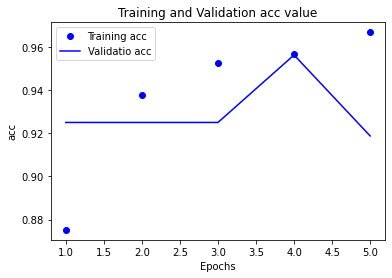

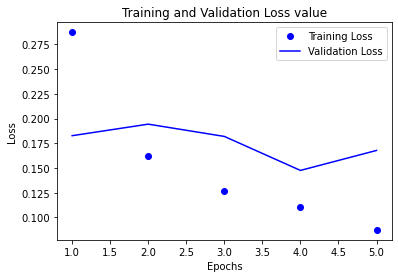

In [12]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

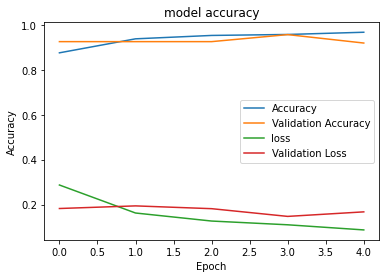

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

### 3.5 Evaluation gender file

In [15]:
# Predicting the Test set results
#y_pred = classifier.predict_classes(val_set, 50)
y_pred = np.argmax(classifier1.predict(test_set), axis=-1)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[562,  22],
       [ 36, 381]], dtype=int64)

In [18]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.94      0.96      0.95       584
        male       0.95      0.91      0.93       417

    accuracy                           0.94      1001
   macro avg       0.94      0.94      0.94      1001
weighted avg       0.94      0.94      0.94      1001



In [24]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title="Confusion matrix",
                         cmap=plt.cm.Blues):
    """"
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    plt.imshow (cm, interpolation ="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("confusion matrix, without normalization")
    
    print(cm)
    thresh =cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label") 

confusion matrix, without normalization
[[562  22]
 [ 36 381]]


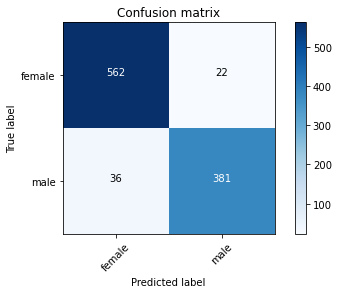

In [20]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix")

# <font color='blue'>4. Visualizing convnets learning</font> <a class="anchor" id="fifth-bullet"></a>
[Back to TOC](#toc)

In [93]:
# Preprocessing a single image
img_path = 'dataset/Training/male/000203.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255

print(img_tensor.shape)

(1, 64, 64, 3)


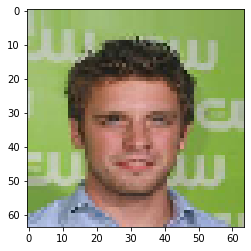

(1, 64, 64, 3)


In [94]:
img_path = 'dataset/Training/male/000203.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [97]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier1.predict(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [[9.999999e-01 1.153921e-07]]


In [98]:
# Instantiating a model from an input tensor and a list of output tensors
from tensorflow.keras import models
layer_outputs = [layer.output for layer in classifier1.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier1.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [99]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [100]:
len(activations)

7

In [101]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)

(1, 29, 29, 32)


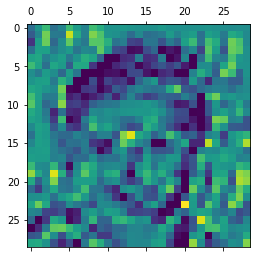

In [102]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

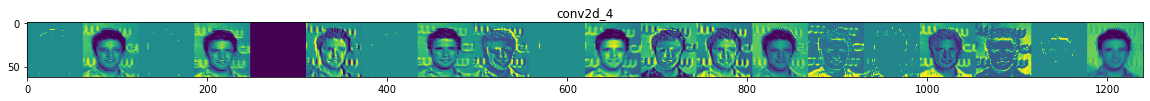

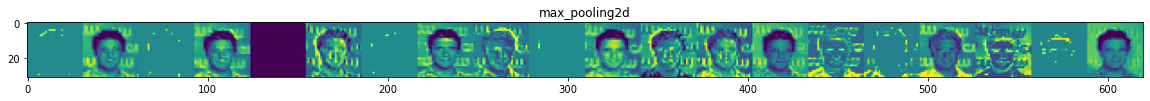

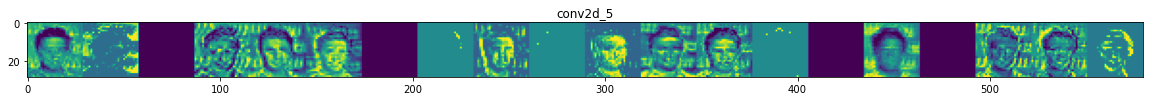

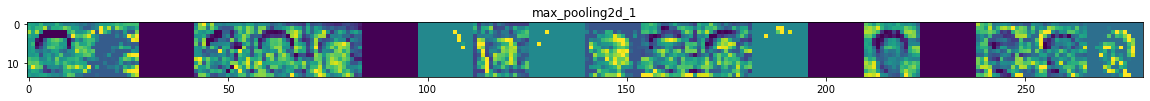

In [103]:
layer_names = []
for layer in classifier1.layers[:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 20

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

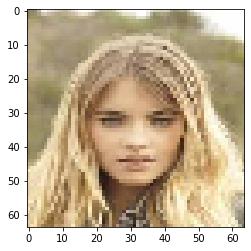

(1, 64, 64, 3)


In [104]:
img_path = 'dataset/Training/female/000019.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [105]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier1.predict(images, batch_size=10)
# print("Predicted class is:",classes)

In [106]:
# Instantiating a model from an input tensor and a list of output tensors
from tensorflow.keras import models
layer_outputs = [layer.output for layer in classifier1.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier1.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [107]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [108]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)

(1, 29, 29, 32)


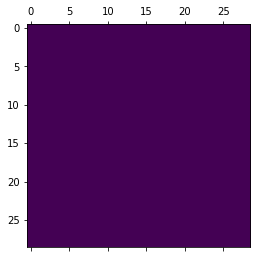

In [109]:
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

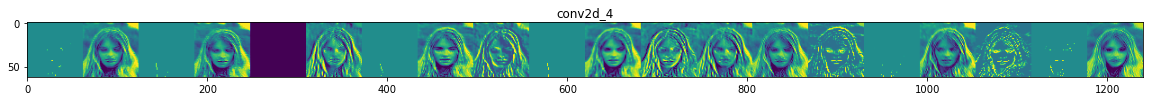

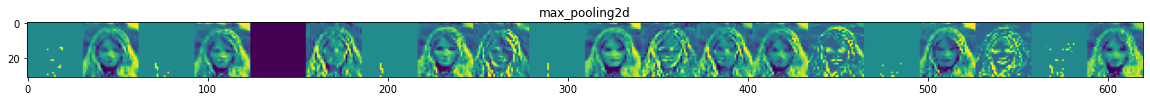

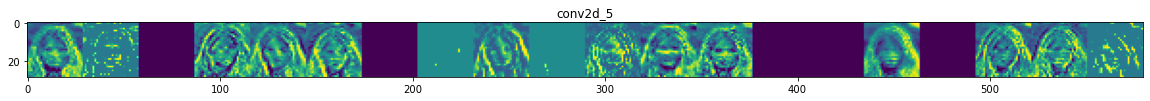

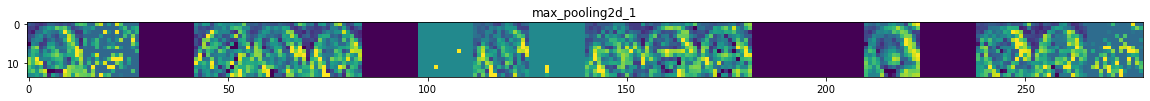

In [110]:
layer_names = []
for layer in classifier1.layers[:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 20

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

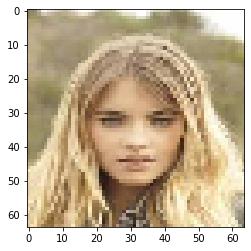

In [111]:
# Displaying the test pictures
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [112]:
# Instantiating a model from an input tensor and a list of output tensors
from tensorflow.keras import models

layer_outputs = [layer.output for layer in classifier1.layers[:8]]
activation_model = models.Model(inputs=classifier1.input, outputs=layer_outputs)

In [113]:
# Runing the model in predict mode
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 32)


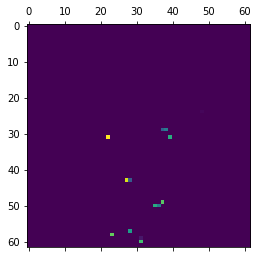

In [114]:
# Visualizing the fourth channel
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

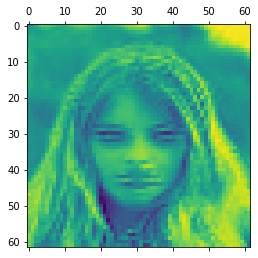

In [115]:
# Visualizing the fourth channel
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

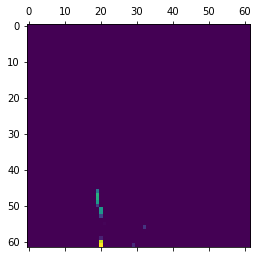

In [116]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

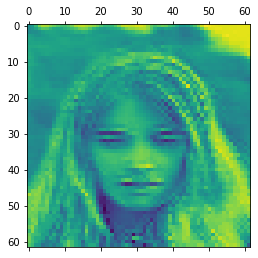

In [117]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

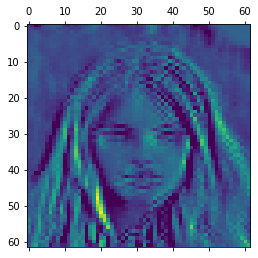

In [118]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

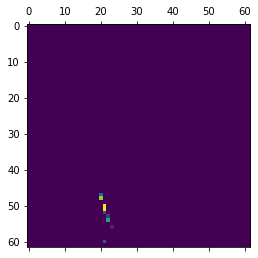

In [119]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

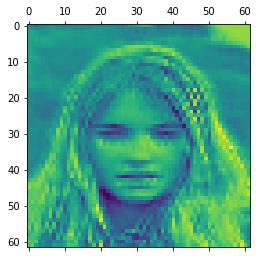

In [120]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

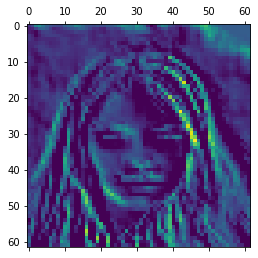

In [121]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')

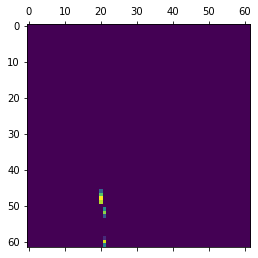

In [122]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')

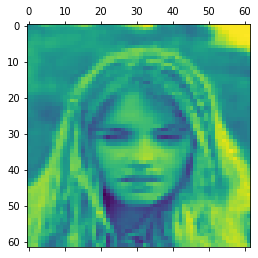

In [123]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 10], cmap='viridis')

In [124]:
# Preprocessing a single image
img_path = 'dataset/Training/female/000029.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255

print(img_tensor.shape)

(1, 64, 64, 3)


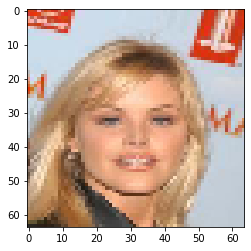

In [125]:
# Displaying the test pictures
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [126]:
# Instantiating a model from an input tensor and a list of output tensors
from tensorflow.keras import models

layer_outputs = [layer.output for layer in classifier1.layers[:10]]
activation_model = models.Model(inputs=classifier1.input, outputs=layer_outputs)

In [127]:
# Runing the model in predict mode
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[3]
print(first_layer_activation.shape)

(1, 14, 14, 32)


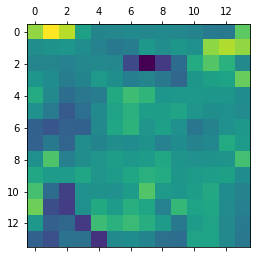

In [128]:
# Visualizing the fourth channel
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

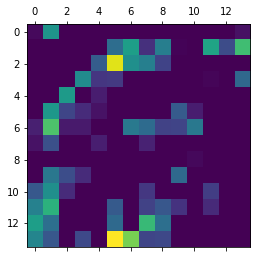

In [129]:
# Visualizing the fourth channel
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

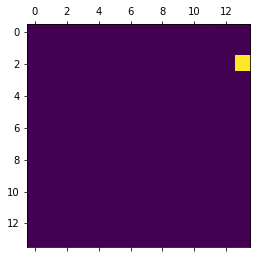

In [130]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

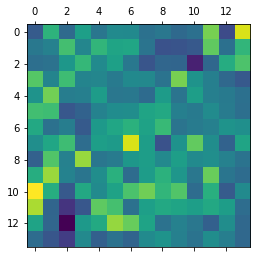

In [131]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

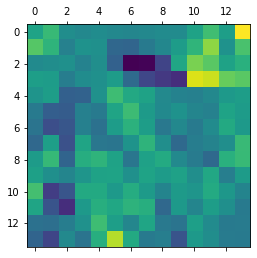

In [132]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

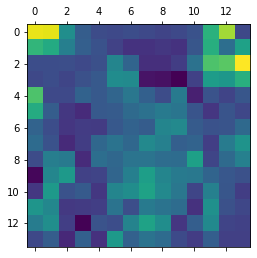

In [133]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

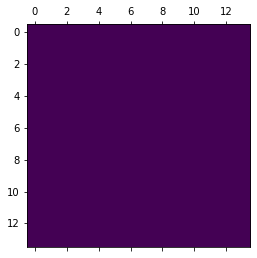

In [134]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

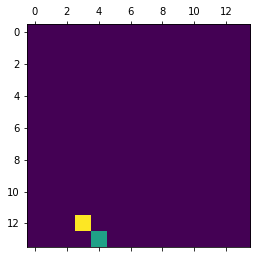

In [135]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

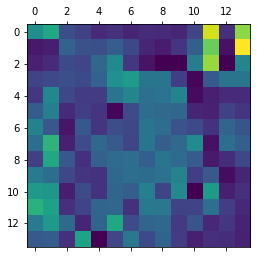

In [136]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')

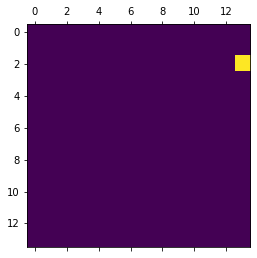

In [137]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')

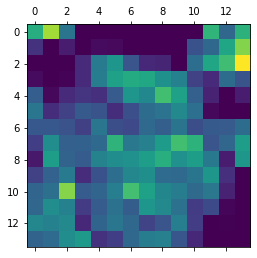

In [138]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 10], cmap='viridis')

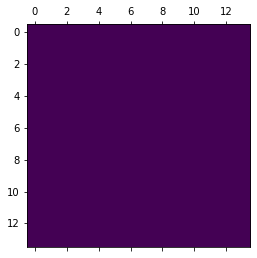

In [139]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')

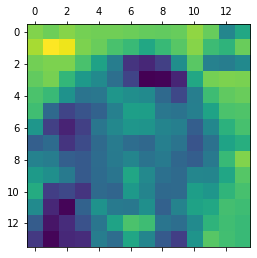

In [140]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

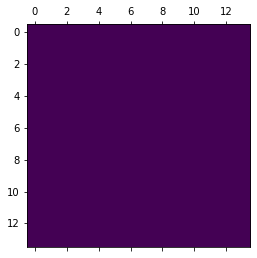

In [141]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')

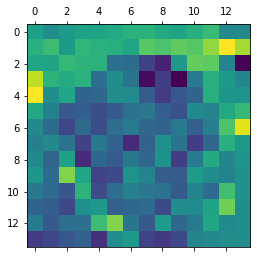

In [142]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')

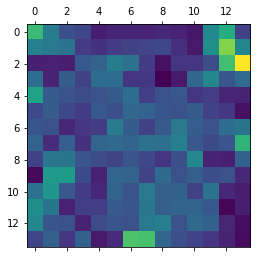

In [143]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 18], cmap='viridis')

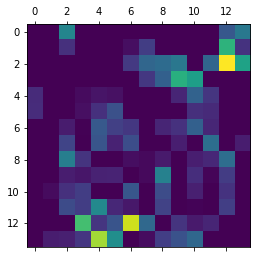

In [144]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

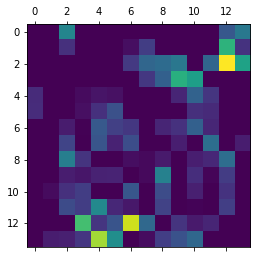

In [145]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

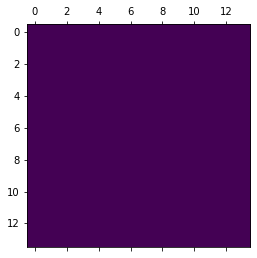

In [146]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 20], cmap='viridis')

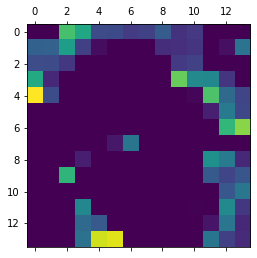

In [147]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 21], cmap='viridis')

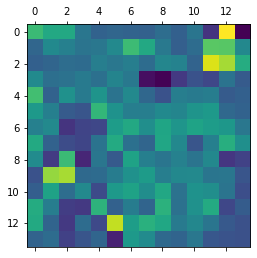

In [148]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 22], cmap='viridis')

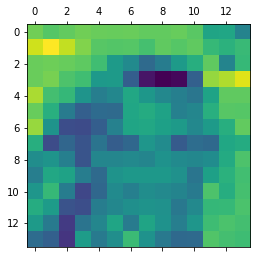

In [149]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 23], cmap='viridis')

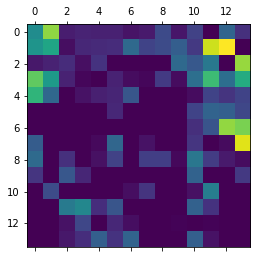

In [150]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 24], cmap='viridis')

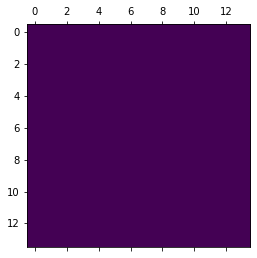

In [151]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 25], cmap='viridis')

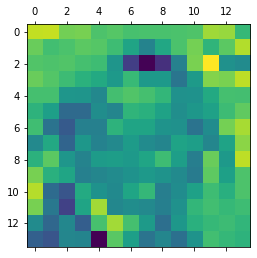

In [152]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 26], cmap='viridis')

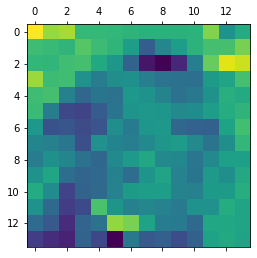

In [153]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 27], cmap='viridis')

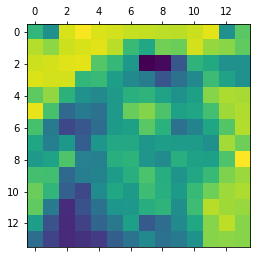

In [154]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 28], cmap='viridis')

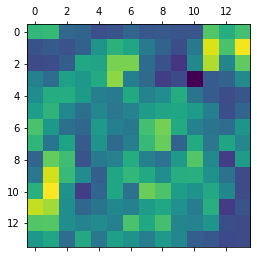

In [155]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 29], cmap='viridis')

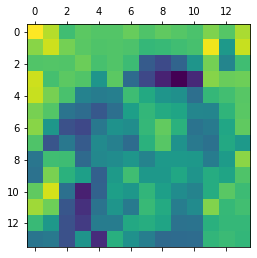

In [156]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')

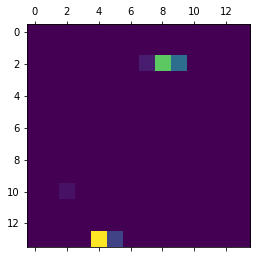

In [157]:
# Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')

## <font color='blue'>5. Appying Dropout</font> <a class="anchor" id="sixth-bullet"></a>
[Back to TOC](#toc)

### 5.1 Building the network

In [87]:
# Initialising the CNN
classifier2 = Sequential()

# Step 1 - Convolution
classifier2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier2.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier2.add(Flatten())

# Adding dropout
classifier2.add(layers.Dropout(0.5))

# Step 4 - Full connection
classifier2.add(Dense(units = 128, activation = 'relu'))
classifier2.add(Dense(units = 2, activation = 'softmax'))

classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)             

In [88]:
# Compiling the CNN
classifier2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [89]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [90]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'])
                                            #class_mode = 'binary'
                                            # , shuffle=False
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'], shuffle=False)
                                            #class_mode = 'binary'


Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


In [91]:
history=classifier2.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 10,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/10
550/550 [==============================] - 119s 213ms/step - loss: 0.3335 - accuracy: 0.8524 - val_loss: 0.1322 - val_accuracy: 0.9563
Epoch 2/10
550/550 [==============================] - 117s 212ms/step - loss: 0.2028 - accuracy: 0.9170 - val_loss: 0.1807 - val_accuracy: 0.9312
Epoch 3/10
550/550 [==============================] - 108s 196ms/step - loss: 0.1735 - accuracy: 0.9303 - val_loss: 0.1673 - val_accuracy: 0.9625
Epoch 4/10
550/550 [==============================] - 112s 204ms/step - loss: 0.1554 - accuracy: 0.9371 - val_loss: 0.1077 - val_accuracy: 0.9625
Epoch 5/10
550/550 [==============================] - 115s 210ms/step - loss: 0.1425 - accuracy: 0.9434 - val_loss: 0.0872 - val_accuracy: 0.9750
Epoch 6/10
550/550 [==============================] - 113s 205ms/step - loss: 0.1290 - accuracy: 0.9496 - val_loss: 0.1477 - val_accuracy: 0.9187
Epoch 7/10
550/550 [==============================] - 120s 217ms/step - loss: 0.1175 - accuracy: 0.9540 - val_loss: 0.1497 -

In [92]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

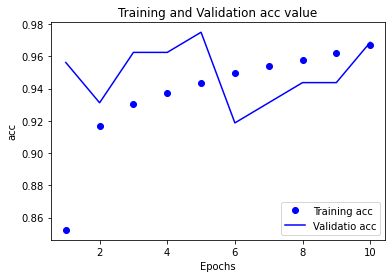

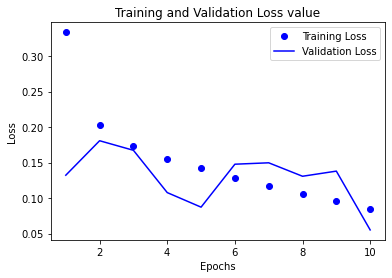

In [93]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 5.2 Test set Prediction

#### 5.2.1 Gender Prediction (Dropout)

In [94]:
y_pred = np.argmax(classifier2.predict(test_set), axis=-1)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [95]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [96]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[557,  27],
       [ 23, 394]], dtype=int64)

In [97]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.96      0.95      0.96       584
        male       0.94      0.94      0.94       417

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



confusion matrix, without normalization
[[557  27]
 [ 23 394]]


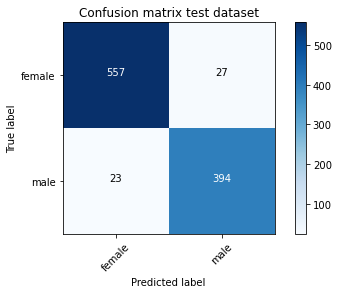

In [98]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix test dataset")

## <font color='blue'>6. Data Augmentation and Dropout</font> <a class="anchor" id="seventh-bullet"></a>
[Back to TOC](#toc)

In [99]:
# Initialising the CNN
classifier3 = Sequential()

# Step 1 - Convolution
classifier3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier3.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier3.add(Flatten())

# Adding dropout
classifier3.add(layers.Dropout(0.5))

# Step 4 - Full connection
classifier3.add(Dense(units = 128, activation = 'relu'))
classifier3.add(Dense(units = 2, activation = 'softmax'))

classifier3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dropout_1 (Dropout)         (None, 6272)             

In [100]:
# Compiling the CNN
classifier3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [101]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

                                    

test_datagen = ImageDataGenerator(rescale = 1./255)

In [103]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'], shuffle=False)
                                            #class_mode = 'binary'
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'], shuffle=False)
                                            #class_mode = 'binary'
    

Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


In [104]:
history=classifier3.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 10,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/10
550/550 [==============================] - 191s 343ms/step - loss: 0.5960 - accuracy: 0.6840 - val_loss: 0.4474 - val_accuracy: 0.8062
Epoch 2/10
550/550 [==============================] - 189s 343ms/step - loss: 0.5320 - accuracy: 0.7330 - val_loss: 0.3948 - val_accuracy: 0.8000
Epoch 3/10
550/550 [==============================] - 189s 343ms/step - loss: 0.5033 - accuracy: 0.7484 - val_loss: 0.5020 - val_accuracy: 0.7250
Epoch 4/10
550/550 [==============================] - 207s 376ms/step - loss: 0.4852 - accuracy: 0.7662 - val_loss: 0.2030 - val_accuracy: 0.9250
Epoch 5/10
550/550 [==============================] - 194s 353ms/step - loss: 0.4633 - accuracy: 0.7807 - val_loss: 0.3266 - val_accuracy: 0.8250
Epoch 6/10
550/550 [==============================] - 198s 360ms/step - loss: 0.4490 - accuracy: 0.7886 - val_loss: 0.1878 - val_accuracy: 0.9187
Epoch 7/10
550/550 [==============================] - 198s 359ms/step - loss: 0.4401 - accuracy: 0.7941 - val_loss: 0.2612 -

In [105]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

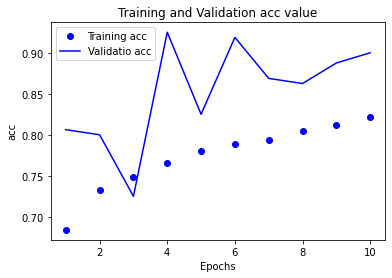

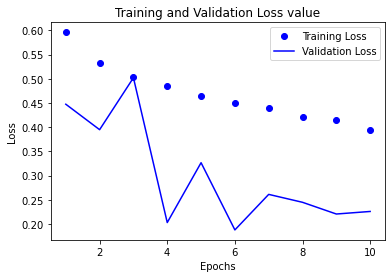

In [106]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 6.1 Test set Prediction

In [107]:
y_pred = np.argmax(classifier3.predict(test_set), axis=-1)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [108]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [109]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[513,  71],
       [ 79, 338]], dtype=int64)

In [110]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.87      0.88      0.87       584
        male       0.83      0.81      0.82       417

    accuracy                           0.85      1001
   macro avg       0.85      0.84      0.85      1001
weighted avg       0.85      0.85      0.85      1001



confusion matrix, without normalization
[[513  71]
 [ 79 338]]


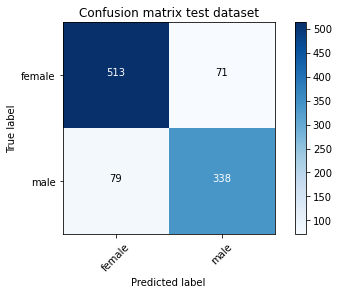

In [111]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix test dataset")

## <font color='blue'>7. Optimizing The model with TensorBoard</font><a class="anchor" id="eigth-bullet"></a>
[Back to TOC](#toc)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'])
                                            #class_mode = 'binary'
                                            # , shuffle=False
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes = ['female', 'male'], shuffle=False)
                                            #class_mode = 'binary'

Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


In [6]:
# Initialising the CNN
bestmodel = Sequential()

# Step 1 - Convolution
bestmodel.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
bestmodel.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
bestmodel.add(Conv2D(32, (3, 3), activation = 'relu'))
bestmodel.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
bestmodel.add(Conv2D(32, (3, 3), activation = 'relu'))
bestmodel.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
bestmodel.add(Flatten())

# Adding dropout
bestmodel.add(layers.Dropout(0.3))

# Step 4 - Full connection
bestmodel.add(Dense(units = 64, activation = 'relu'))
bestmodel.add(Dense(units = 2, activation = 'softmax'))

bestmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [7]:
# Compiling the CNN
bestmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=bestmodel.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 10,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/10
550/550 [==============================] - 64s 116ms/step - loss: 0.3577 - accuracy: 0.8327 - val_loss: 0.1595 - val_accuracy: 0.9375
Epoch 2/10
550/550 [==============================] - 60s 109ms/step - loss: 0.1909 - accuracy: 0.9232 - val_loss: 0.1451 - val_accuracy: 0.9438
Epoch 3/10
550/550 [==============================] - 59s 108ms/step - loss: 0.1581 - accuracy: 0.9370 - val_loss: 0.1332 - val_accuracy: 0.9688
Epoch 4/10
550/550 [==============================] - 61s 110ms/step - loss: 0.1415 - accuracy: 0.9446 - val_loss: 0.1420 - val_accuracy: 0.9312
Epoch 5/10
550/550 [==============================] - 63s 114ms/step - loss: 0.1258 - accuracy: 0.9511 - val_loss: 0.1767 - val_accuracy: 0.9375
Epoch 6/10
550/550 [==============================] - 58s 106ms/step - loss: 0.1181 - accuracy: 0.9548 - val_loss: 0.1148 - val_accuracy: 0.9563
Epoch 7/10
550/550 [==============================] - 58s 105ms/step - loss: 0.1108 - accuracy: 0.9569 - val_loss: 0.0773 - val_ac

#### 7.1 Test set Prediction

In [9]:
y_pred = np.argmax(bestmodel.predict(test_set), axis=-1)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [10]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[566,  18],
       [ 26, 391]], dtype=int64)

In [18]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.96      0.97      0.96       584
        male       0.96      0.94      0.95       417

    accuracy                           0.96      1001
   macro avg       0.96      0.95      0.95      1001
weighted avg       0.96      0.96      0.96      1001



confusion matrix, without normalization
[[566  18]
 [ 26 391]]


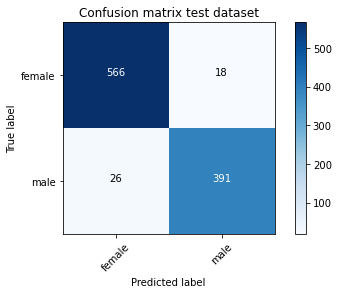

In [37]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix test dataset")

## <font color='blue'>8. Train a Fine-Tuned Neural Network with TensorFlow's Keras API </font><a class="anchor" id="nineth-bullet"></a>
[Back to TOC](#toc)

# 1. VGG16

### a) Bulid the Model

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. 

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

In [21]:
base_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 15s 0us/step


In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
type(base_model)

keras.engine.functional.Functional

In [24]:
VGG16_model = Sequential()
for layer in base_model.layers[:-1]:
    VGG16_model.add(layer)

In [25]:
for layer in VGG16_model.layers:
    layer.trainable = False

In [26]:
VGG16_model.add(Dense(units=2, activation='softmax'))

In [27]:
VGG16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [28]:
VGG16_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### b) Preprocessing

In [29]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [32]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (224, 224),
                                                 batch_size = 10,
                                                class_mode = 'categorical')
                                            #class_mode = 'binary'
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical', shuffle=False)

Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


### c) Train the model

In [33]:
history=VGG16_model.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 10,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/10
550/550 [==============================] - 1404s 3s/step - loss: 0.3333 - accuracy: 0.8829 - val_loss: 0.4355 - val_accuracy: 0.9200
Epoch 2/10
550/550 [==============================] - 2220s 4s/step - loss: 0.2914 - accuracy: 0.8973 - val_loss: 0.2750 - val_accuracy: 0.9200
Epoch 3/10
550/550 [==============================] - 1379s 3s/step - loss: 0.2750 - accuracy: 0.9062 - val_loss: 0.4318 - val_accuracy: 0.8400
Epoch 4/10
550/550 [==============================] - 1360s 2s/step - loss: 0.2534 - accuracy: 0.9184 - val_loss: 0.1520 - val_accuracy: 0.9400
Epoch 5/10
550/550 [==============================] - 1385s 3s/step - loss: 0.2467 - accuracy: 0.9198 - val_loss: 0.2621 - val_accuracy: 0.9200
Epoch 6/10
550/550 [==============================] - 1384s 3s/step - loss: 0.2233 - accuracy: 0.9258 - val_loss: 0.3957 - val_accuracy: 0.8800
Epoch 7/10
550/550 [==============================] - 1398s 3s/step - loss: 0.2099 - accuracy: 0.9273 - val_loss: 0.5149 - val_accuracy:

In [ ]:
# # save the model
# VGG16_model.save('VGG16_model.h5')

In [275]:
# # Loading the model
# VGG16_model = load_model('VGG16_model.h5')
# VGG16_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### d) Displaying curves of loss and accuracy during training 

In [38]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

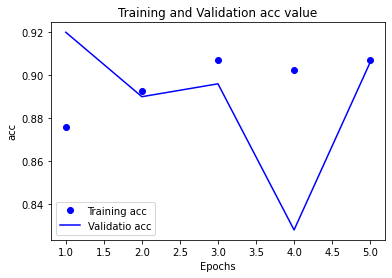

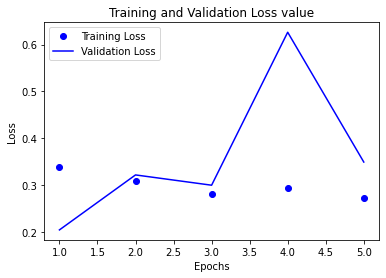

In [156]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### e) Male & Famele Prediction

In [39]:
y_pred = np.argmax(VGG16_model.predict(test_set), axis=-1)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[532,  52],
       [ 59, 358]], dtype=int64)

In [42]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.90      0.91      0.91       584
        male       0.87      0.86      0.87       417

    accuracy                           0.89      1001
   macro avg       0.89      0.88      0.89      1001
weighted avg       0.89      0.89      0.89      1001



confusion matrix, without normalization
[[532  52]
 [ 59 358]]


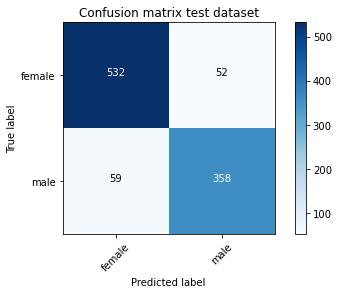

In [43]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix test dataset")

# 2. VGG19

### a) Build the Model

In [44]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

In [45]:
base_model = tf.keras.applications.vgg19.VGG19()

574726144/574710816 [==============================] - 23s 0us/step


In [46]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [47]:
VGG19_model = Sequential()
for layer in base_model.layers[:-1]:
    VGG19_model.add(layer)

In [48]:
for layer in VGG19_model.layers:
    layer.trainable = False

In [49]:
VGG19_model.add(Dense(units=2, activation='softmax'))

In [50]:
VGG19_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### b) Preprocessing 

In [51]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

In [52]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (224, 224),
                                                 batch_size = 10,
                                                class_mode = 'categorical')
                                            #class_mode = 'binary'
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical', shuffle=False)
                                            #class_mode = 'binary'


Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


### c) Train the Model

In [53]:
history=VGG19_model.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 5,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/5
550/550 [==============================] - 1716s 3s/step - loss: 0.3314 - accuracy: 0.8845 - val_loss: 0.4522 - val_accuracy: 0.8800
Epoch 2/5
550/550 [==============================] - 1703s 3s/step - loss: 0.2959 - accuracy: 0.9005 - val_loss: 0.2241 - val_accuracy: 0.9200
Epoch 3/5
550/550 [==============================] - 1691s 3s/step - loss: 0.2666 - accuracy: 0.9109 - val_loss: 0.3213 - val_accuracy: 0.8600
Epoch 4/5
550/550 [==============================] - 2083s 4s/step - loss: 0.2585 - accuracy: 0.9109 - val_loss: 0.2524 - val_accuracy: 0.9600
Epoch 5/5
550/550 [==============================] - 1697s 3s/step - loss: 0.2592 - accuracy: 0.9122 - val_loss: 0.5367 - val_accuracy: 0.9000


In [ ]:
# # save the model
# VGG19_model.save('VGG19_model.h5')

In [297]:
# # Loading the model
# VGG19_model = load_model('VGG19_model.h5')
# VGG19_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### d) Displaying curves of loss and accuracy during training 

In [54]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

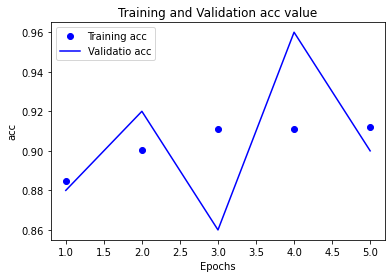

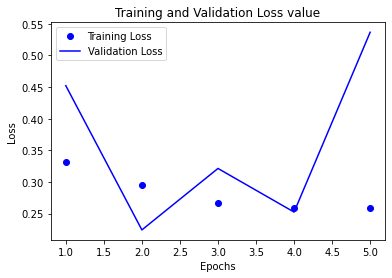

In [55]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### e) Male & Famele Prediction

In [56]:
y_pred = np.argmax(VGG19_model.predict(test_set), axis=-1)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[542,  42],
       [ 79, 338]], dtype=int64)

In [59]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.87      0.93      0.90       584
        male       0.89      0.81      0.85       417

    accuracy                           0.88      1001
   macro avg       0.88      0.87      0.87      1001
weighted avg       0.88      0.88      0.88      1001



confusion matrix, without normalization
[[542  42]
 [ 79 338]]


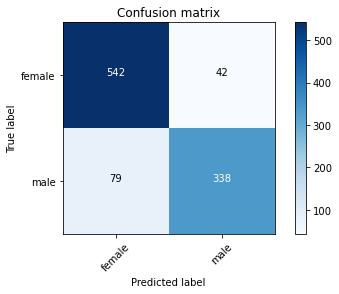

In [60]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix")

# 3. VGGFace

### a) Build the Model

In [77]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        

In [78]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a prediction layer layer with 2 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
VGGFace_model = Model(inputs=base_model.input, outputs=predictions)

In [79]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [80]:
VGGFace_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [81]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

In [82]:
VGGFace_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### b) Preprocessing

In [83]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [84]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (224, 224),
                                                 batch_size = 10,
                                                class_mode = 'categorical')
                                            #class_mode = 'binary'
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical', shuffle=False)
                                            #class_mode = 'binary'

Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


### c) Train the Model

In [85]:
history=VGGFace_model.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 5,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/5
550/550 [==============================] - 627s 1s/step - loss: 1.0168 - accuracy: 0.6938 - val_loss: 0.6055 - val_accuracy: 0.7000
Epoch 2/5
550/550 [==============================] - 586s 1s/step - loss: 0.5325 - accuracy: 0.7380 - val_loss: 0.4218 - val_accuracy: 0.8400
Epoch 3/5
550/550 [==============================] - 599s 1s/step - loss: 0.5155 - accuracy: 0.7540 - val_loss: 0.5586 - val_accuracy: 0.7000
Epoch 4/5
550/550 [==============================] - 611s 1s/step - loss: 0.4976 - accuracy: 0.7576 - val_loss: 0.4905 - val_accuracy: 0.7400
Epoch 5/5
550/550 [==============================] - 608s 1s/step - loss: 0.4770 - accuracy: 0.7736 - val_loss: 0.4522 - val_accuracy: 0.7600


In [ ]:
# # Loading the model
# VGGFace_model = load_model('VGGFace_model.h5')
# VGGFace_model.summary()

### d) Displaying curves of loss and accuracy during training 

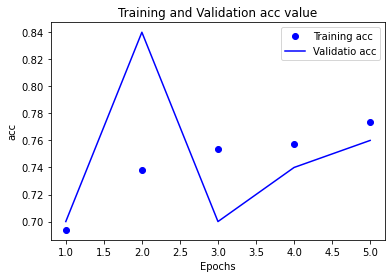

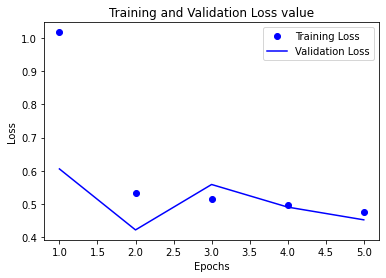

In [86]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### e) Test set Predtiction

In [87]:
y_pred = np.argmax(VGGFace_model.predict(test_set), axis=-1)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [88]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [89]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[481, 103],
       [132, 285]], dtype=int64)

In [90]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.78      0.82      0.80       584
        male       0.73      0.68      0.71       417

    accuracy                           0.77      1001
   macro avg       0.76      0.75      0.76      1001
weighted avg       0.76      0.77      0.76      1001



confusion matrix, without normalization
[[481 103]
 [132 285]]


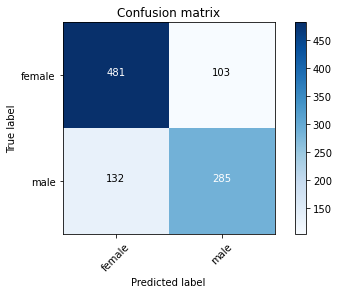

In [91]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix")

# 4. ResNet50

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

### a) Build the Model

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 3s 0us/step


In [10]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [11]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
ResNet50_model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [13]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [14]:
ResNet50_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### b) Preprocessing

In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (224, 224),
                                                 batch_size = 10,
                                                class_mode = 'categorical')
                                            #class_mode = 'binary'
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical', shuffle=False)
                                            #class_mode = 'binary'

Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


### c) Train the Model

In [17]:
history=ResNet50_model.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 5,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/5
550/550 [==============================] - 628s 1s/step - loss: 0.2772 - accuracy: 0.9022 - val_loss: 0.1386 - val_accuracy: 0.9400
Epoch 2/5
550/550 [==============================] - 651s 1s/step - loss: 0.1718 - accuracy: 0.9307 - val_loss: 0.1351 - val_accuracy: 0.9600
Epoch 3/5
550/550 [==============================] - 650s 1s/step - loss: 0.1571 - accuracy: 0.9365 - val_loss: 0.1956 - val_accuracy: 0.9200
Epoch 4/5
550/550 [==============================] - 642s 1s/step - loss: 0.1528 - accuracy: 0.9362 - val_loss: 0.1548 - val_accuracy: 0.9400
Epoch 5/5
550/550 [==============================] - 592s 1s/step - loss: 0.1432 - accuracy: 0.9431 - val_loss: 0.1169 - val_accuracy: 0.9600


### d) Displaying curves of loss and accuracy during training 

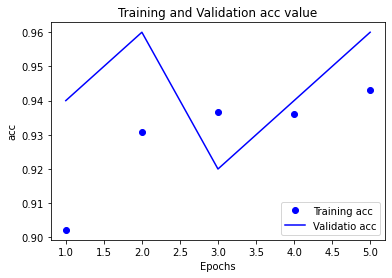

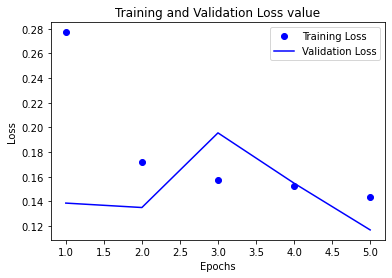

In [18]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### e) Test set Prediction

In [19]:
y_pred = np.argmax(ResNet50_model.predict(test_set), axis=-1)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[554,  30],
       [ 44, 373]], dtype=int64)

In [22]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.93      0.95      0.94       584
        male       0.93      0.89      0.91       417

    accuracy                           0.93      1001
   macro avg       0.93      0.92      0.92      1001
weighted avg       0.93      0.93      0.93      1001



confusion matrix, without normalization
[[554  30]
 [ 44 373]]


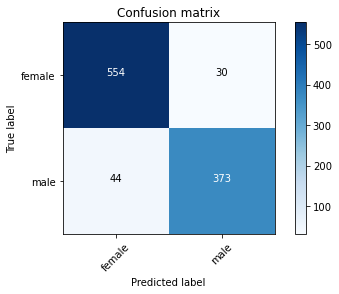

In [25]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix")

# 5. Xception

In [35]:
from keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [36]:
# create the base pre-trained model
base_model = Xception(weights='imagenet', include_top=False)

83697664/83683744 [==============================] - 2s 0us/step


In [37]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        

In [41]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
Xception_model = Model(inputs=base_model.input, outputs=predictions)

In [42]:

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [43]:
Xception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [44]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

In [45]:
# compile the model (should be done *after* setting layers to non-trainable)
#Xception_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

Xception_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### b) Preprocessing

In [46]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [47]:
training_set = train_datagen.flow_from_directory('dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('dataset/Validation',
                                            target_size = (224, 224),
                                                 batch_size = 10,
                                                class_mode = 'categorical')
                                            #class_mode = 'binary'
    
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical', shuffle=False)
                                            #class_mode = 'binary'

Found 18000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


### c) Train the model

In [48]:
history=Xception_model.fit(training_set,
                         steps_per_epoch = 550, # if batch_size=1 -> steps_per_epoch=8000
                         epochs = 5,
                         validation_data = val_set,
                         validation_steps = 5)

Epoch 1/5
550/550 [==============================] - 669s 1s/step - loss: 0.2200 - accuracy: 0.9107 - val_loss: 0.1841 - val_accuracy: 0.9200
Epoch 2/5
550/550 [==============================] - 680s 1s/step - loss: 0.1935 - accuracy: 0.9180 - val_loss: 0.3683 - val_accuracy: 0.8400
Epoch 3/5
550/550 [==============================] - 649s 1s/step - loss: 0.1654 - accuracy: 0.9349 - val_loss: 0.2235 - val_accuracy: 0.9000
Epoch 4/5
550/550 [==============================] - 592s 1s/step - loss: 0.1676 - accuracy: 0.9331 - val_loss: 0.0541 - val_accuracy: 0.9800
Epoch 5/5
550/550 [==============================] - 644s 1s/step - loss: 0.1540 - accuracy: 0.9418 - val_loss: 0.1913 - val_accuracy: 0.8800


In [ ]:
# # save the model
# Xception_model.save('Xception_model2.h5')

In [360]:
# # Loading the model
# Xception_model = load_model('Xception_model2.h5')
# Xception_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

### d) Displaying curves of loss and accuracy during training 

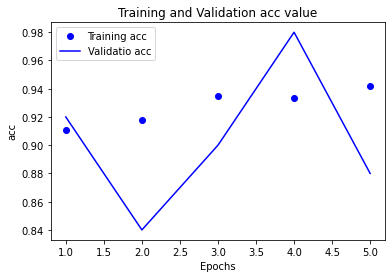

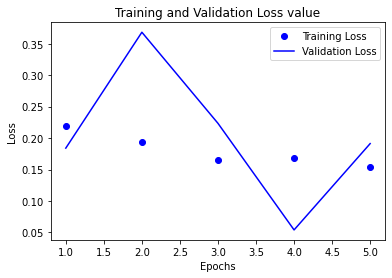

In [49]:
#history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validatio acc')
plt.title('Training and Validation acc value')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### e) Test set Prediction

In [50]:
y_pred = np.argmax(Xception_model.predict(test_set), axis=-1)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
y_true = test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[536,  48],
       [ 44, 373]], dtype=int64)

In [53]:
target_names = ['female', 'male']
cr = classification_report(y_true, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      female       0.92      0.92      0.92       584
        male       0.89      0.89      0.89       417

    accuracy                           0.91      1001
   macro avg       0.91      0.91      0.91      1001
weighted avg       0.91      0.91      0.91      1001



confusion matrix, without normalization
[[536  48]
 [ 44 373]]


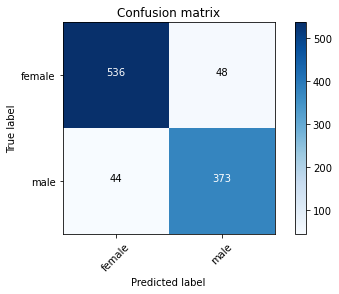

In [54]:
plot_confusion_matrix(cm=cm, classes=target_names, title="Confusion matrix")